In [1]:
### Cleaning Numerical Data lab


In [2]:
###1.Import the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
###2.Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [4]:
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
###3.First, look at its main features (head, shape, info).

In [6]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
print(customer_df.shape)

(9134, 24)


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
###4.Rename the columns so they follow the PE8 (snake case).

In [10]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
customer_df.columns = [column.lower() for column in customer_df.columns] 
customer_df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
customer_df.columns =[col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [13]:
###5.Fix the data types of any other column/columns as you might see necessary. 
###Note that sometimes there are some features you might want to use as categorical, but they are read as numerical 
###by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column 
###might be read as numerical by python, but you would want to use that column as categorical data. 
###Hint: One thing you can try is to change date column to datetime format.

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [15]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date']).dt.to_period('M')
customer_df['effective_to_date']

0       2011-02
1       2011-01
2       2011-02
3       2011-01
4       2011-02
         ...   
9129    2011-02
9130    2011-02
9131    2011-02
9132    2011-02
9133    2011-02
Name: effective_to_date, Length: 9134, dtype: period[M]

In [16]:
customer_df['number_of_policies'].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5], dtype=int64)

In [17]:
customer_df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [18]:
customer_df['months_since_policy_inception'].unique()

array([ 5, 42, 38, 65, 44, 94, 13, 68,  3,  7, 87, 82, 25, 10, 50, 59,  1,
       21, 49, 91, 47, 64, 54,  6, 14, 56, 17, 40, 62, 86, 79, 15, 32, 28,
       16,  4, 57, 77, 95, 26, 53, 12, 98, 36, 71, 60, 20,  0, 27, 48, 33,
       83, 30, 69, 90, 81, 84, 88, 18, 11, 85, 93, 34, 89,  2, 70, 37, 43,
        8, 35, 99, 55, 75, 51, 92, 29, 63, 61, 46, 41, 31, 45, 67, 22, 23,
        9, 72, 96, 58, 66, 73, 39, 19, 97, 52, 76, 78, 80, 74, 24],
      dtype=int64)

In [19]:
customer_df['number_of_open_complaints'].unique()

array([0, 2, 1, 3, 5, 4], dtype=int64)

In [20]:
customer_df['months_since_last_claim'].unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25], dtype=int64)

In [21]:
###6.Plot a correlation matrix, and comment on what you observe.

In [22]:
datacorr= round(customer_df.corr(),2)
datacorr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


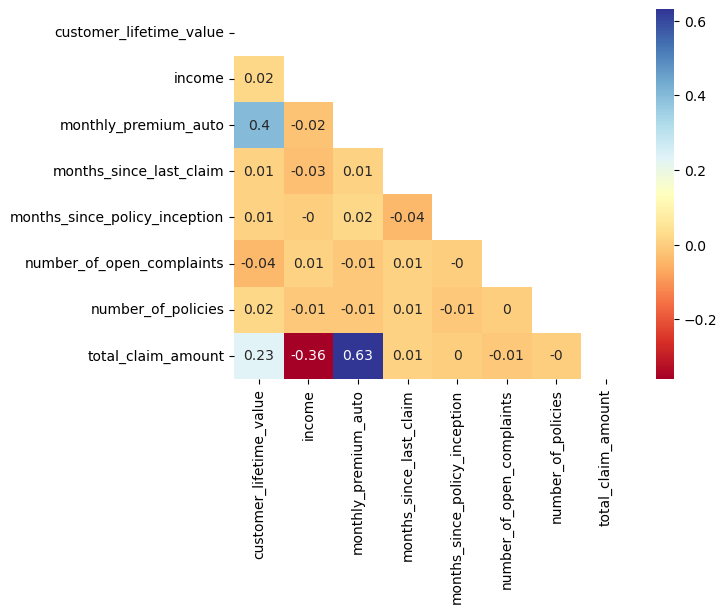

In [23]:
mask = np.zeros_like(datacorr, dtype=bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(datacorr, annot= True, mask=mask, cmap='RdYlBu')
plt.show()

In [ ]:
####Observation: There is no evidence of severe multicollinearity, but there is a understandable correlation between the monthly premium paid and the total amount claimed (the more you pay, the more you can claim!). Depending on the performance of the rgeression model further down the line, we can then choose to retain or the drop the variable

In [ ]:
###7.Plot every continuous variable. Comment what you can see in the plots.

In [25]:
data_num= customer_df.select_dtypes(np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


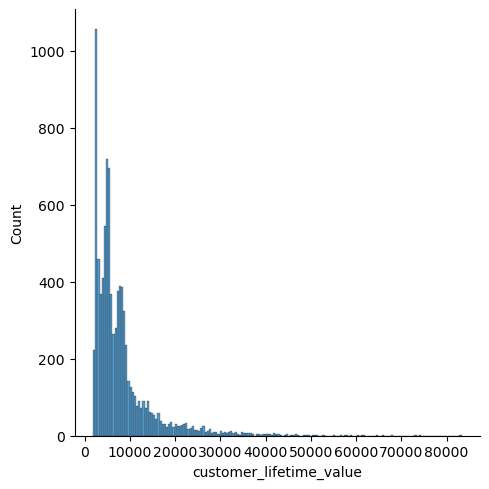

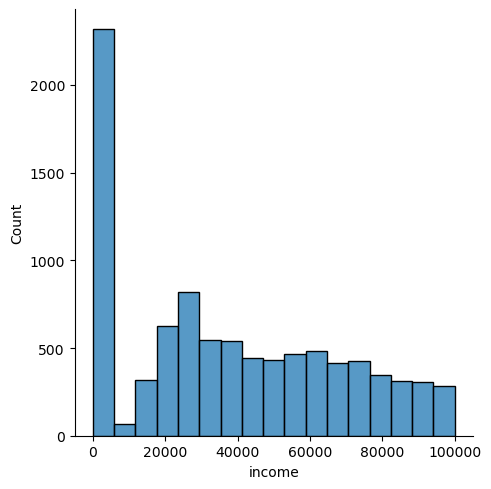

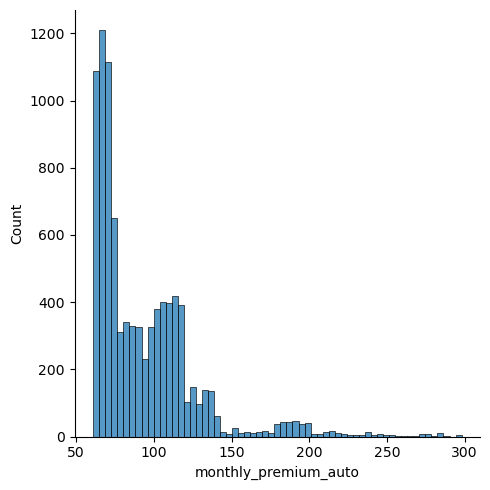

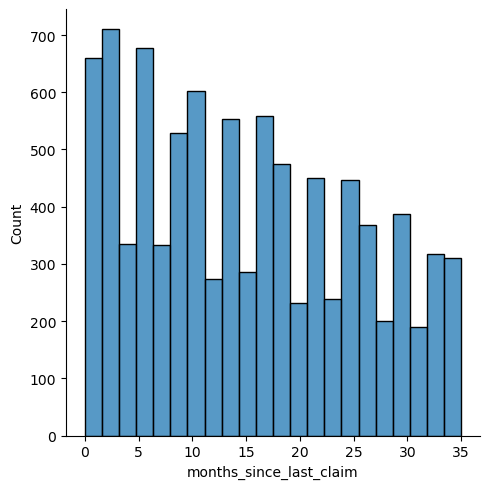

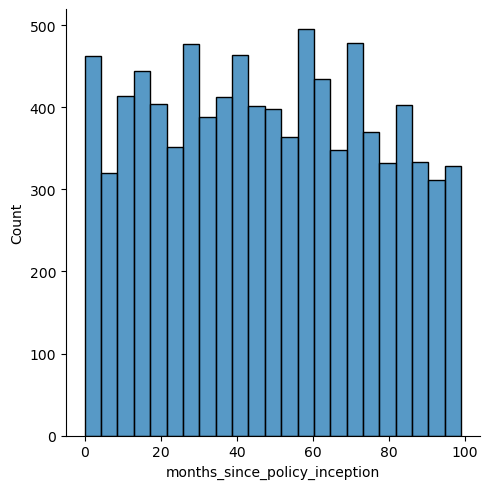

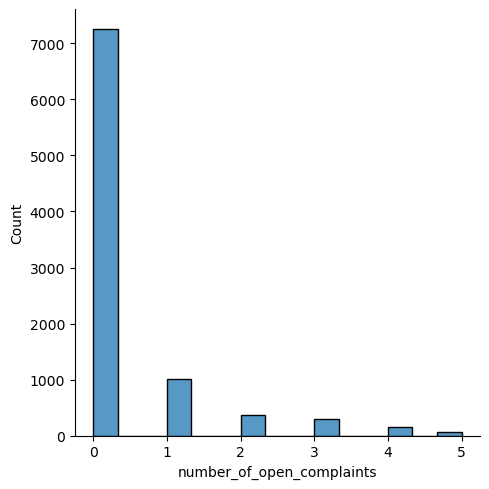

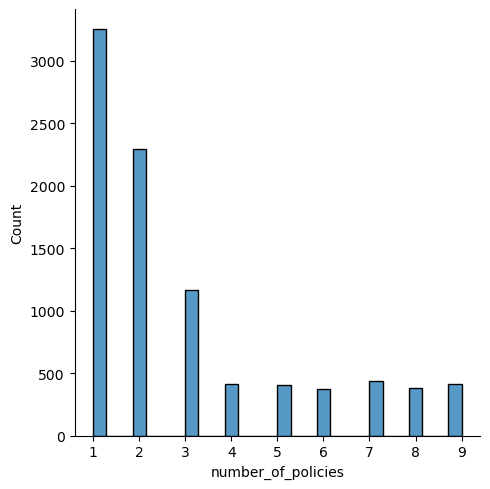

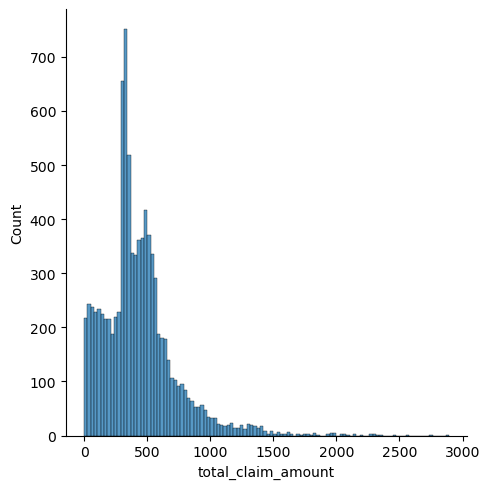

In [58]:
for column in data_num.columns:
    sns.displot(customer_df[column])
plt.show()

In [ ]:
####Observation: With the exception of 'Months Since Policy Inception', the distribution of all the numerical variables are generally skewed to the right

In [ ]:
###8.Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited 
###for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before
###you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. 
###Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an 
###appropriate measure on the y-axis.

In [31]:
data_obj = customer_df.select_dtypes(include = 'object') 
data_obj.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [40]:
customer_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

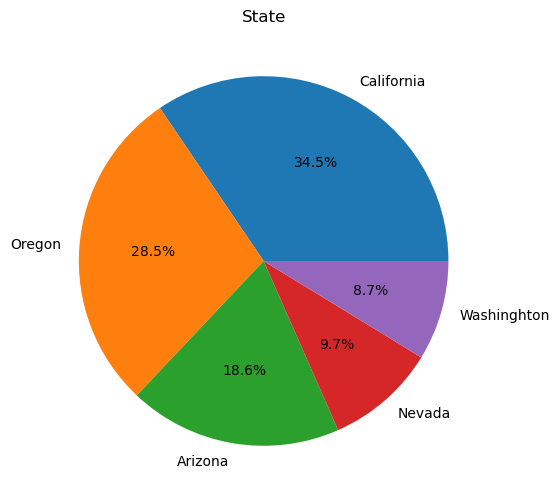

In [52]:
plt.subplots(figsize=(6,6)) #Piecharts are a lovely alternative to barcharts sometimes
plt.pie(customer_df['state'].value_counts(), labels=['California', 'Oregon', 'Arizona', 'Nevada', 'Washinghton'], autopct="%1.1f%%")
plt.title('State')
plt.show()

In [ ]:
####Most clients reside in the states of Oregon and California

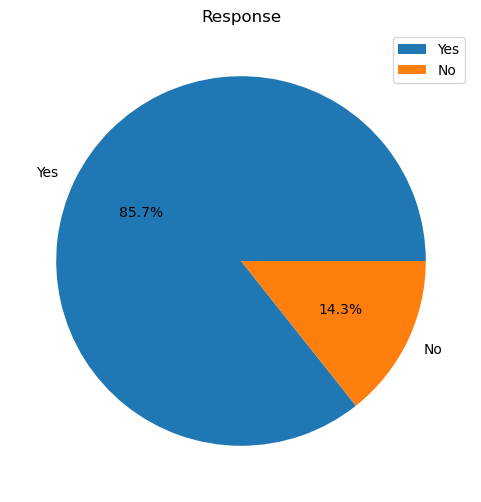

In [65]:
plt.subplots(figsize=(6,6))
plt.pie(customer_df['response'].value_counts(), labels=['Yes', 'No'], autopct="%1.1f%%")
plt.legend()
plt.title('Response')
plt.show()

In [ ]:
####Observation: An overwhelming number of clients responded yes

In [67]:
customer_df['coverage'].value_counts() #for plot labels

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

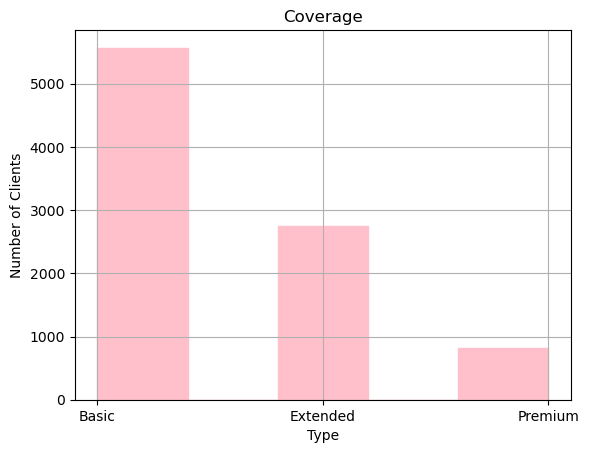

In [70]:
customer_df['coverage'].hist( bins=5, facecolor='pink',edgecolor='pink')
plt.title('Coverage')
plt.xlabel('Type')
plt.ylabel('Number of Clients')
plt.show()

In [ ]:
####Observation: Most clients took out an insurance policy with basic coverage for their vehicles

In [71]:
customer_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [77]:
def without_hue(plot, feature):  #proportion unclear as the values are quite close, so incorporated this function to display percentage atop each bar, maybe a pie chart would have been better in this case but I wanted to see if this function worked
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


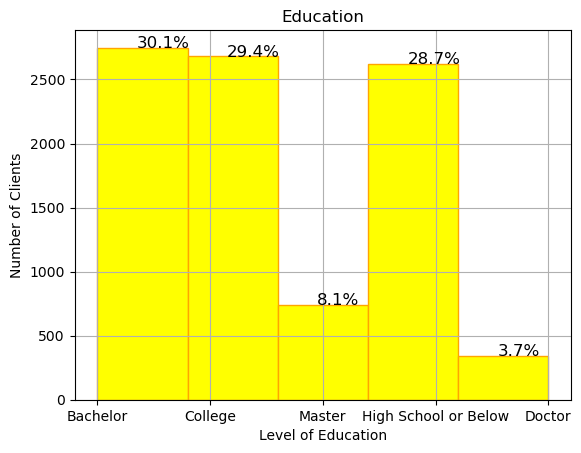

In [94]:
ax=customer_df['education'].hist( bins=5, facecolor='yellow',edgecolor= 'orange')
plt.title('Education')
plt.xlabel('Level of Education')
plt.ylabel('Number of Clients')


without_hue(ax,customer_df['education'] )




In [ ]:
###Observation:Most clients have a bachelor's degree or less, with those having postgraduate degrees in the minority

In [96]:
customer_df['employmentstatus'].value_counts() #for labelling purposes

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

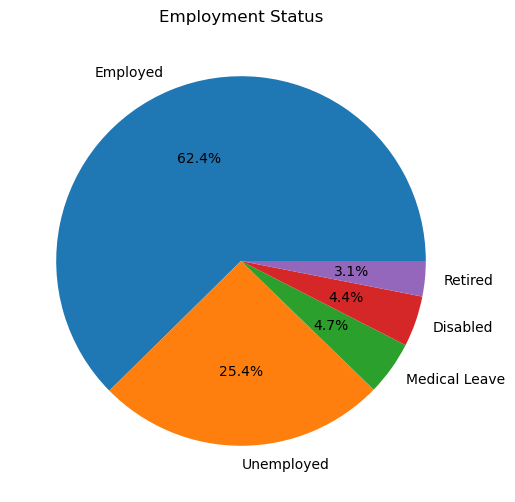

In [97]:
plt.subplots(figsize=(6,6)) #Piecharts are a lovely alternative to barcharts sometimes
plt.pie(customer_df['employmentstatus'].value_counts(), labels=['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'], autopct="%1.1f%%")
plt.title('Employment Status')
plt.show()


In [ ]:
#### Observation: Most clients are employed, with 37.6% of clients (unemployed, retired, disabled, medical leave) currently not in the job market

In [99]:
customer_df['gender'].value_counts() #for labelling purposes

F    4658
M    4476
Name: gender, dtype: int64

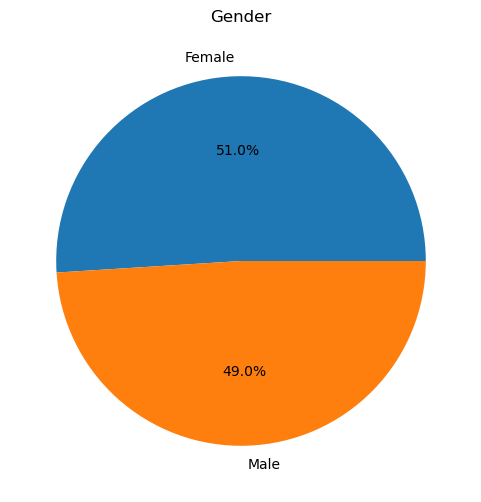

In [100]:
plt.subplots(figsize=(6,6)) #Piecharts are a lovely alternative to barcharts sometimes
plt.pie(customer_df['gender'].value_counts(), labels=['Female', 'Male'], autopct="%1.1f%%")
plt.title('Gender')
plt.show()


In [ ]:
###Observation: Clients are evently split between the female and male genders

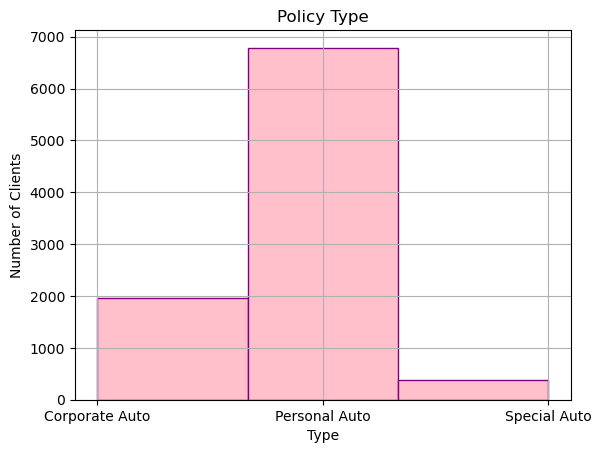

In [109]:
customer_df['policy_type'].hist( bins=3, facecolor='pink',edgecolor='purple')
plt.title('Policy Type')
plt.xlabel('Type')
plt.ylabel('Number of Clients')
plt.show()

In [ ]:
###Observation: Most clients took out insurance policies for their personal vehicles

In [110]:
customer_df['marital_status'].value_counts() #for labelling purposes

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

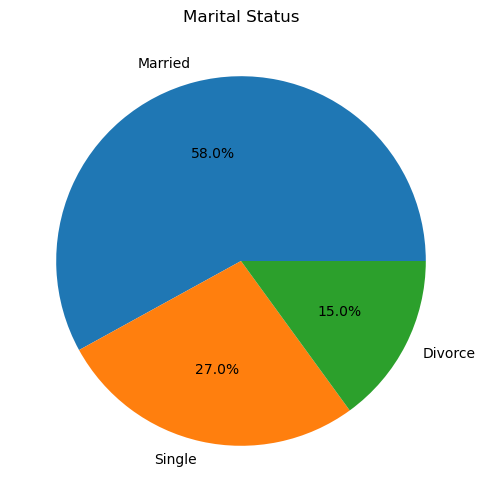

In [111]:
plt.subplots(figsize=(6,6)) #Piecharts are a lovely alternative to barcharts sometimes
plt.pie(customer_df['marital_status'].value_counts(), labels=['Married', 'Single', 'Divorce'], autopct="%1.1f%%")
plt.title('Marital Status')
plt.show()


In [ ]:
####Observation: Most clients are married!

Text(0.5, 1.0, 'Vehicle Class')

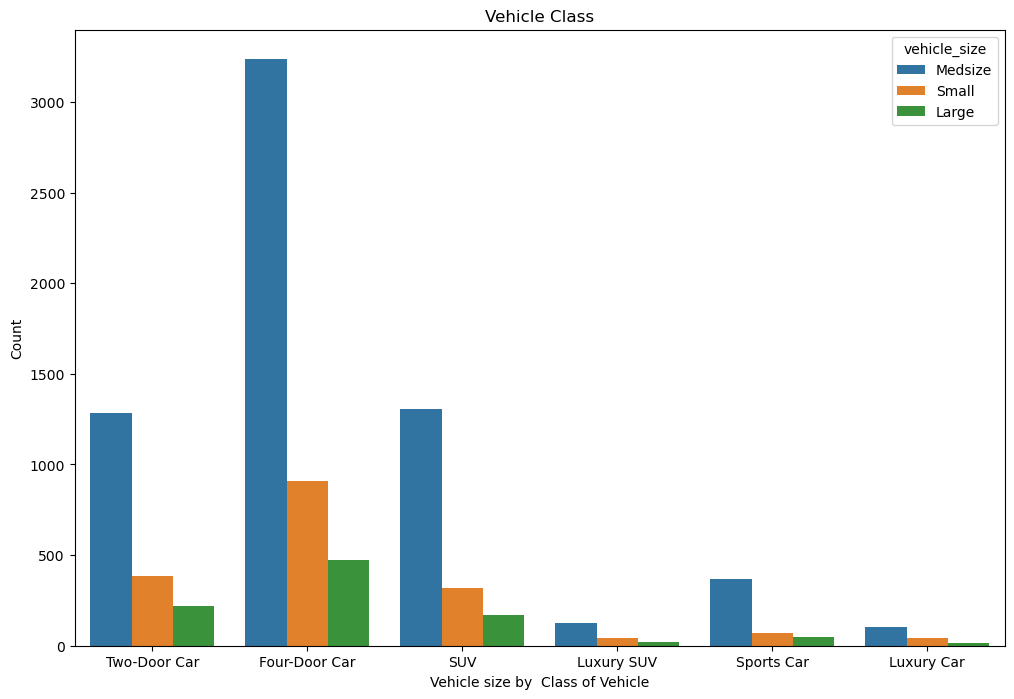

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(customer_df['vehicle_class'], hue='vehicle_size', data=customer_df)
plt.xlabel('Vehicle size by  Class of Vehicle')
plt.ylabel('Count')
plt.title('Vehicle Class')

In [ ]:
####Observation: Most clients have a regular four door car

Text(0.5, 1.0, 'Total Number of Responses by Sales Channel')

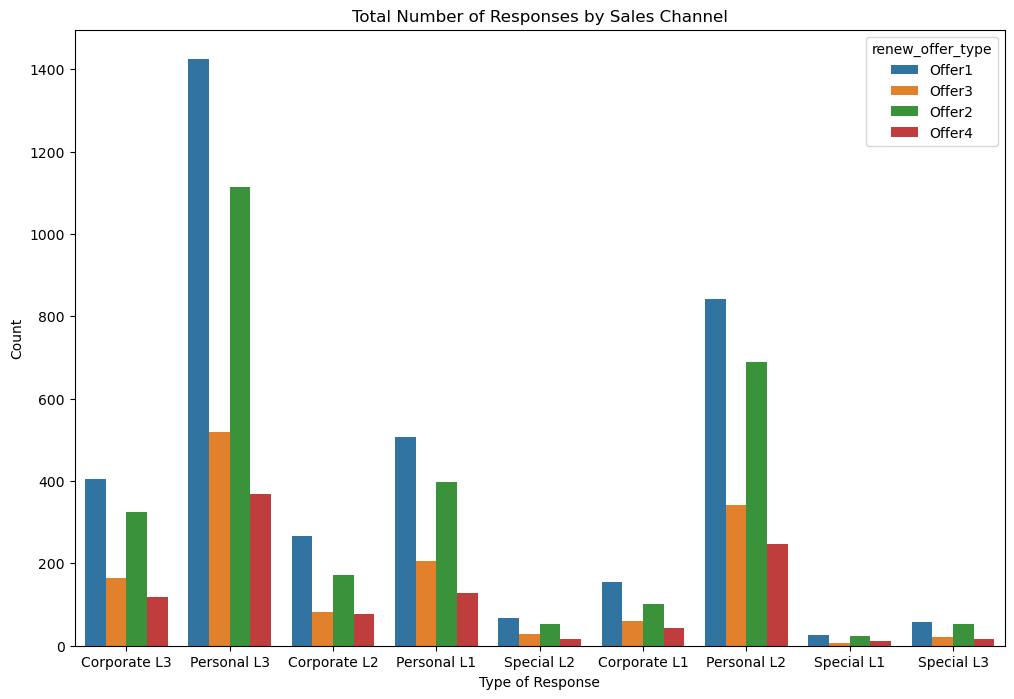

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(customer_df['policy'], hue='renew_offer_type', data=customer_df)
plt.xlabel('Type of Policy')
plt.ylabel('Number of Offers')
plt.title('Total Number of Renew Offers based on Type of Policy')

In [ ]:
####Observation: Most customers who were offered a policy renewal had personal autos, and of the offers available, most receieved offer 1

Text(0.5, 1.0, 'Total Number of Responses by Sales Channel')

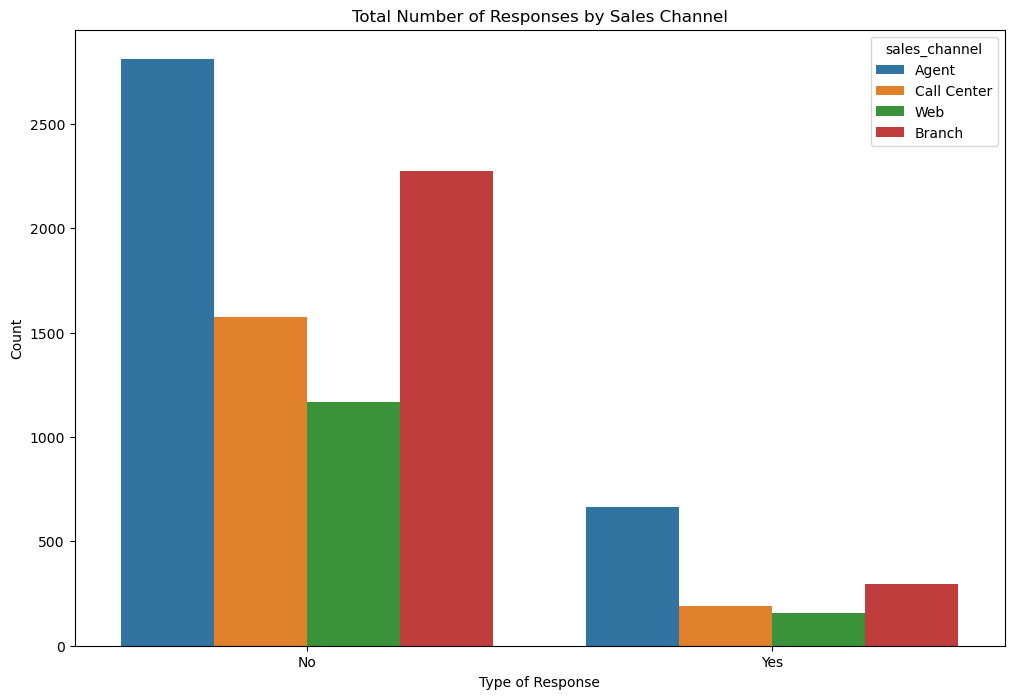

In [106]:
plt.figure(figsize=(12,8))
sns.countplot(customer_df['response'], hue='sales_channel', data=customer_df)
plt.xlabel('Type of Response')
plt.ylabel('Count')
plt.title('Total Number of Responses by Sales Channel')

In [ ]:
####Observation: From this bar chart alone, we can observe that most client outreach attempts were made via agents, which in turn explains why they have the highest number of negative and postive responses.

In [49]:
###9.Look for outliers in the continuous variables. (Hint: There’s a good plot to do that!). In case you find outliers, comment on what you will do with them.

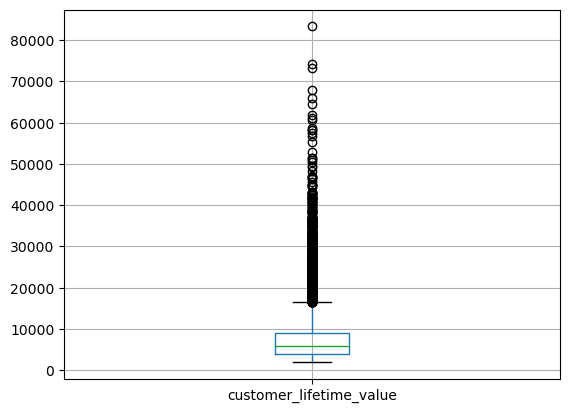

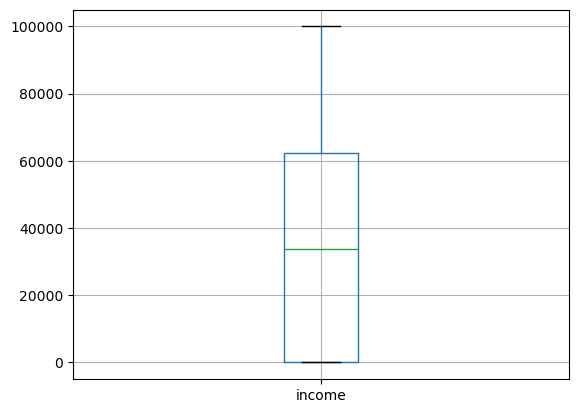

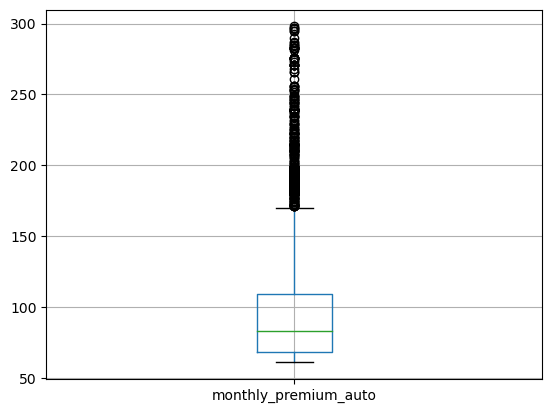

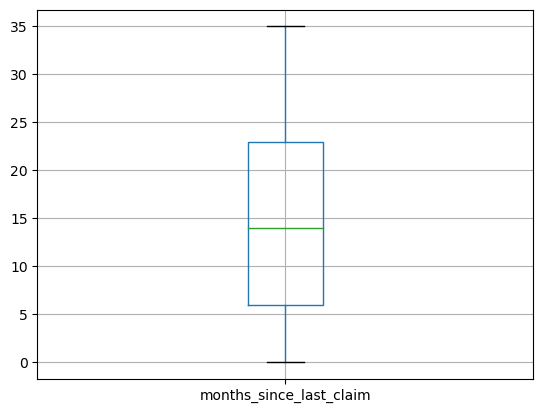

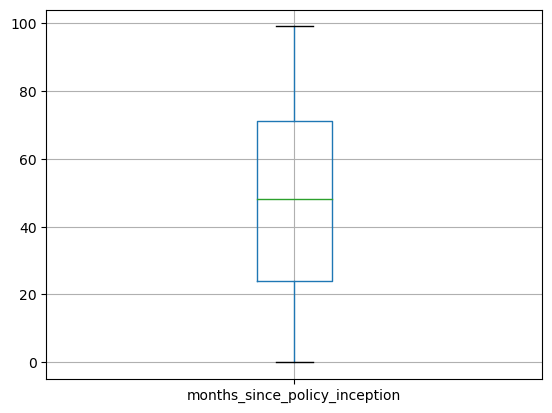

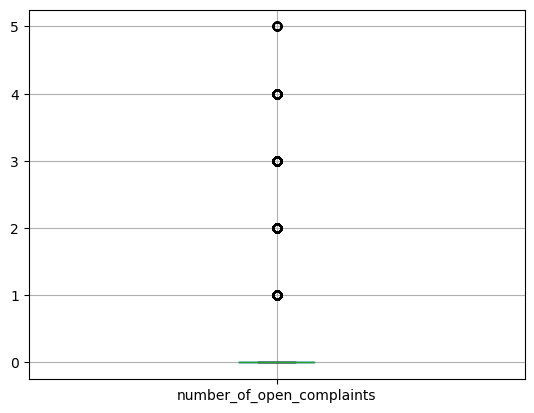

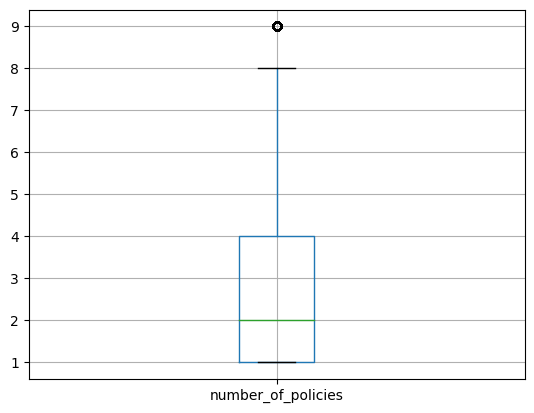

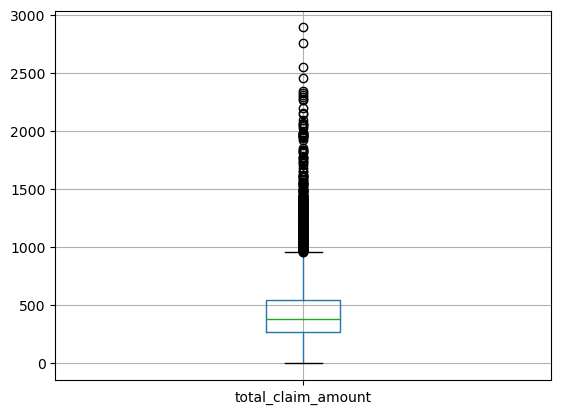

In [118]:
for column in data_num.columns:
    plt.figure()
    data_num.boxplot([column])
plt.show()

In [ ]:
###Observartion: The boxplot reaffirms what is already illustrated in the barcharts above -- that the data if skewed to the left as demonstrated by the interquartile range. All of the outliers will have to be handled differently: number_of_open_complaints can be treated as a categorical, as complaints are notable occurences.A boxcox transformation can be used to deal with the rest of the variables, but in the words of Laz, the process is recursive and might entail some trial and error 

In [ ]:
#10.Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [101]:
customer_df.isna().sum().sum() #No NaN values!

0